In [ ]:
import numpy as np
import pandas as pd
import os
import torch
import torchvision
import torchsample
import psycopg2
import random
import re
import time
import csv
import copy

from torch.autograd import Variable
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data_utils
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
from torch.utils.data.sampler import WeightedRandomSampler
from torchvision import models
from torchvision import transforms
from torchsample import transforms as ts_transforms

from matplotlib import pyplot as plt
from PIL import Image
from scipy.ndimage import imread
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn.gaussian_process import GaussianProcessRegressor

from mpl_toolkits.mplot3d import Axes3D
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

## Load Data

### Train Data Highway

In [17]:
X_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/change/split/highway_train_images.npy')
train_targets = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/change/split/highway_train_targets.npy')
paths_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/change/split/highway_train_filepaths.npy')
meteo_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/change/split/highway_train_meteo.npy')
meteo_train = meteo_train.reshape(meteo_train.shape[0], 4)

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201706/DEBILT-TESTSITE-OVERVIEW_20170618_0330.jpg


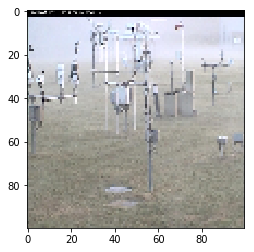

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201706/DEBILT-TESTSITE-OVERVIEW_20170619_0340.jpg


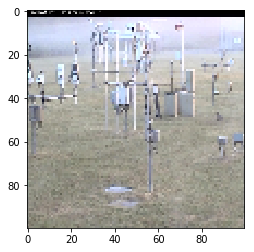

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201706/DEBILT-TESTSITE-OVERVIEW_20170619_0410.jpg


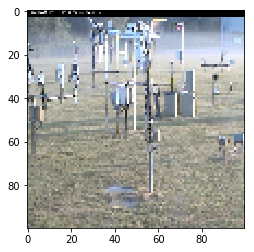

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201801/DEBILT-TESTSITE-OVERVIEW_20180126_0810.jpg


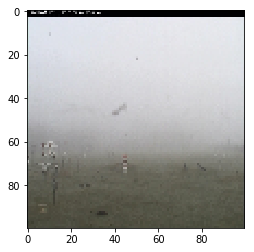

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201801/DEBILT-TESTSITE-OVERVIEW_20180126_0830.jpg


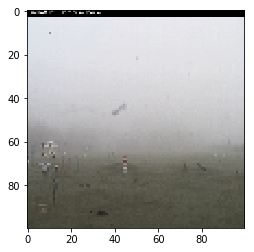

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180314_0600.jpg


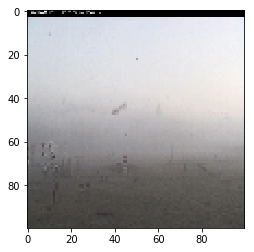

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180314_0610.jpg


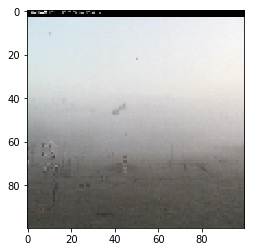

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180314_0620.jpg


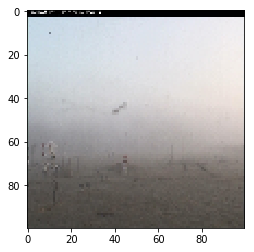

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180314_0630.jpg


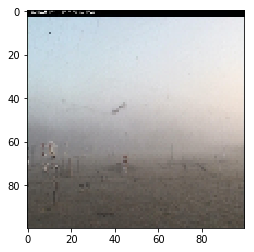

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0540.jpg


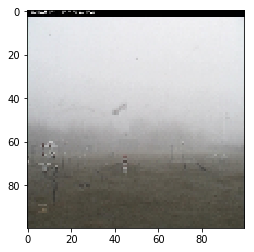

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0600.jpg


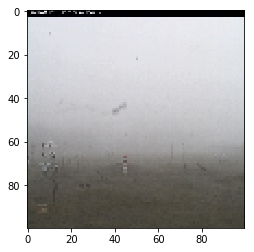

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0610.jpg


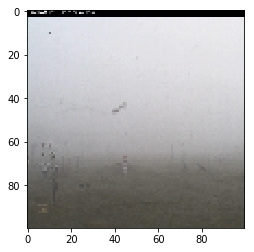

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0620.jpg


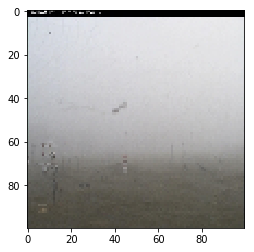

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0630.jpg


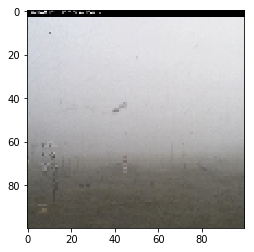

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0640.jpg


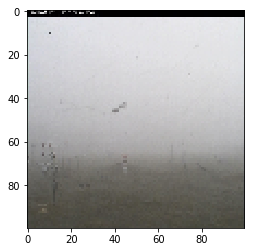

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0650.jpg


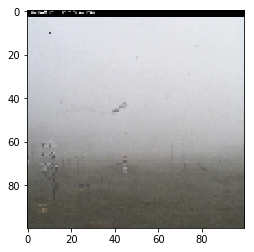

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0700.jpg


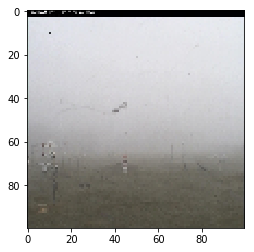

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0710.jpg


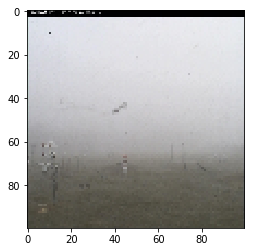

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0720.jpg


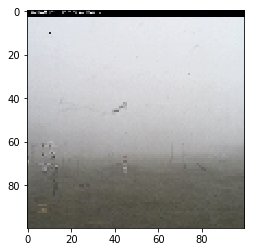

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0730.jpg


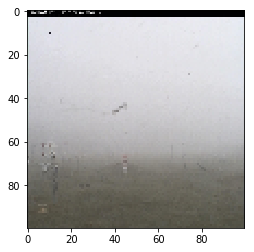

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0740.jpg


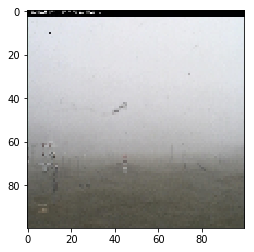

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0750.jpg


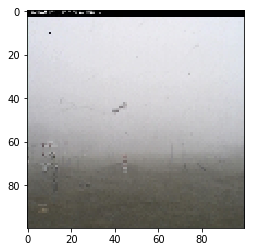

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0800.jpg


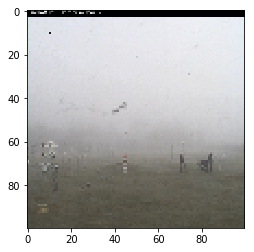

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201803/DEBILT-TESTSITE-OVERVIEW_20180326_0810.jpg


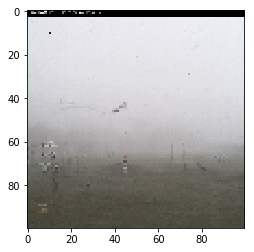

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171201_0800.jpg


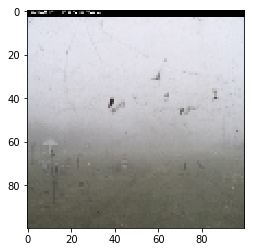

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171201_0810.jpg


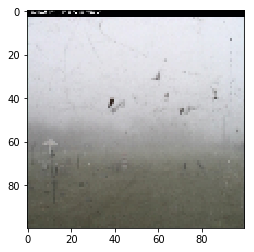

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0730.jpg


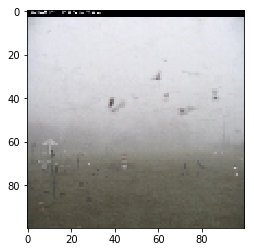

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0740.jpg


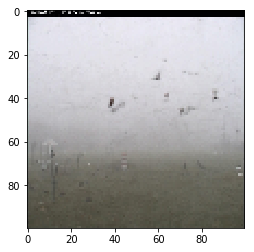

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0750.jpg


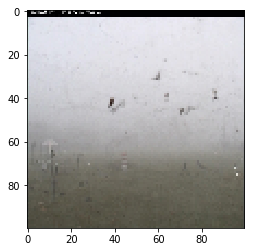

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0800.jpg


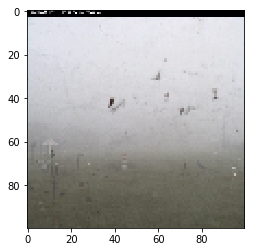

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0810.jpg


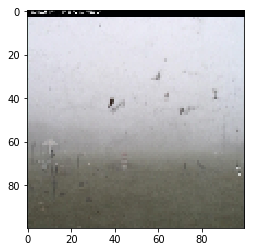

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0820.jpg


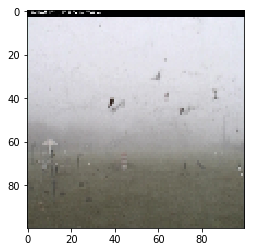

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0830.jpg


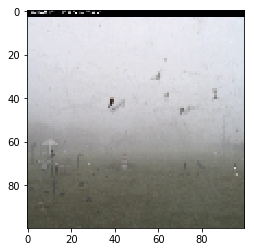

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0840.jpg


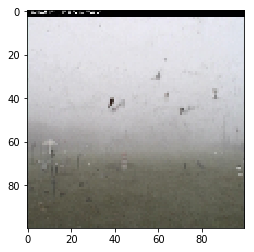

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0850.jpg


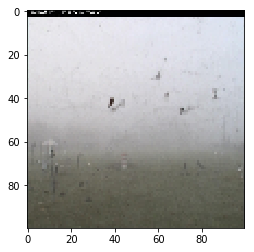

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0900.jpg


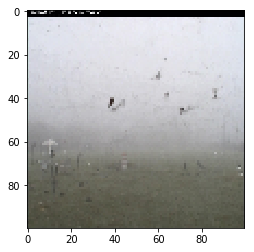

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0910.jpg


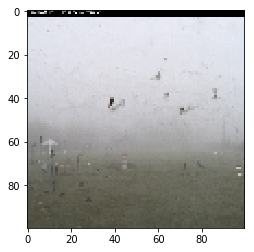

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171202_0920.jpg


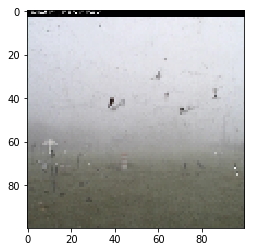

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171210_1300.jpg


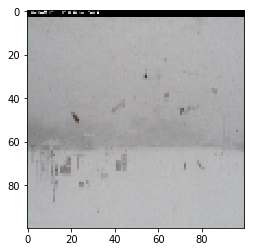

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171210_1310.jpg


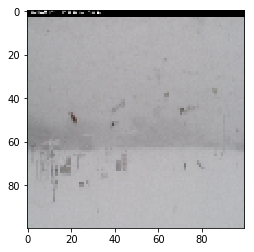

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171210_1320.jpg


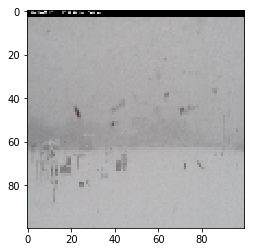

/Volumes/TIMPP/KNMIPictures/DEBILT/TESTSITE-OVERVIEW/201712/DEBILT-TESTSITE-OVERVIEW_20171210_1350.jpg


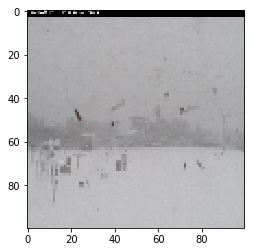

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0340.jpg


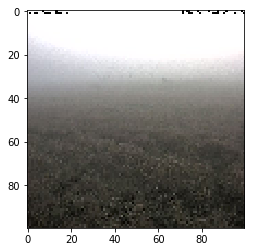

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0350.jpg


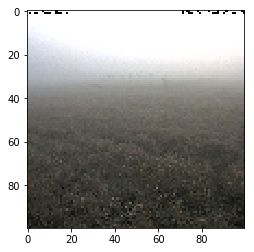

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0400.jpg


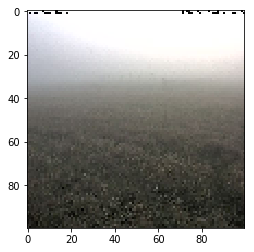

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0410.jpg


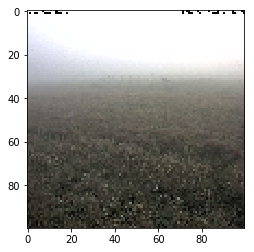

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0420.jpg


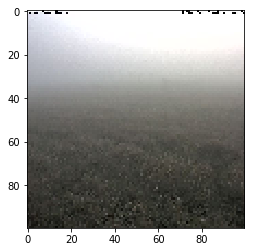

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0430.jpg


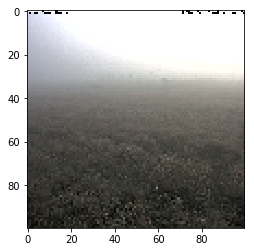

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0440.jpg


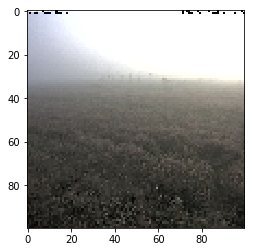

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170706_0450.jpg


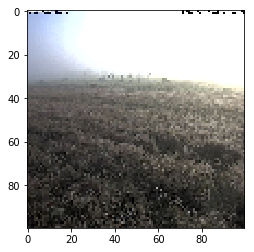

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170714_0340.jpg


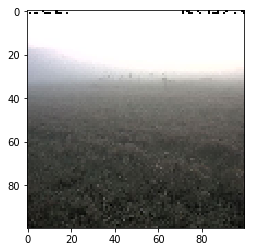

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201707/CABAUW-BSRN-2_20170714_0350.jpg


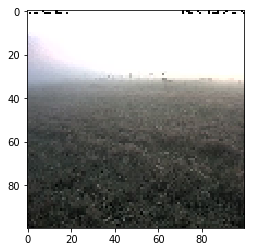

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170811_0500.jpg


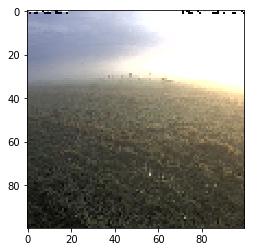

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0430.jpg


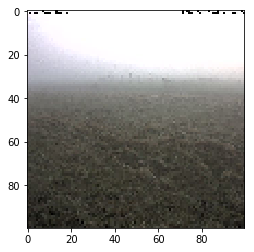

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0440.jpg


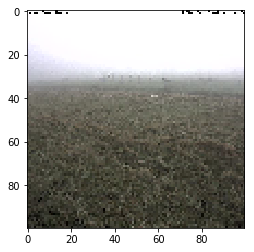

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0450.jpg


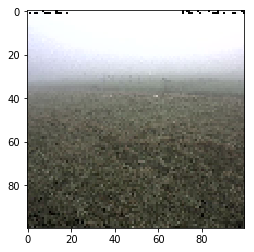

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0500.jpg


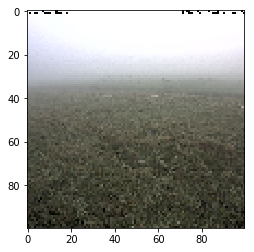

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0510.jpg


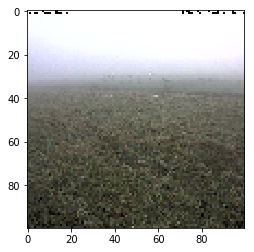

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0520.jpg


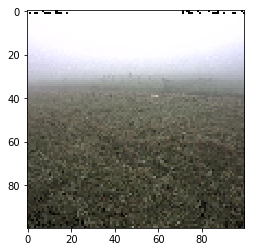

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0530.jpg


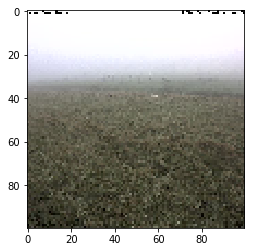

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0540.jpg


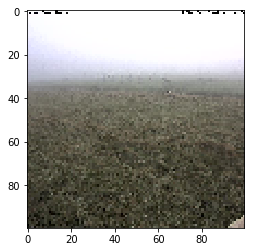

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0550.jpg


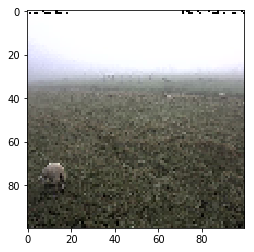

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201708/CABAUW-BSRN-2_20170813_0600.jpg


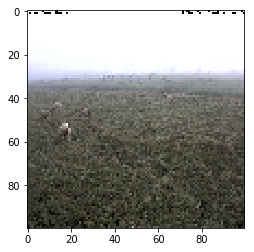

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201801/CABAUW-BSRN-2_20180126_0810.jpg


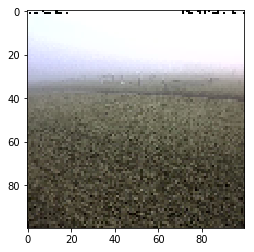

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201801/CABAUW-BSRN-2_20180126_0830.jpg


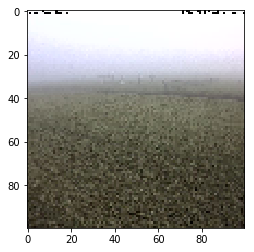

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0550.jpg


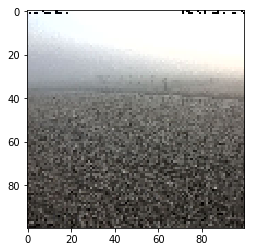

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0600.jpg


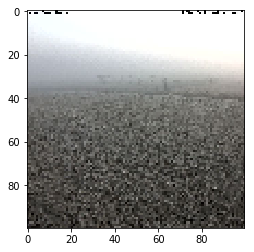

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0610.jpg


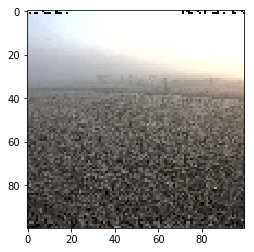

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0620.jpg


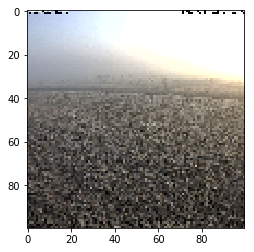

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0630.jpg


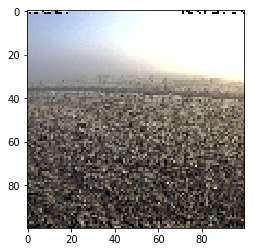

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0640.jpg


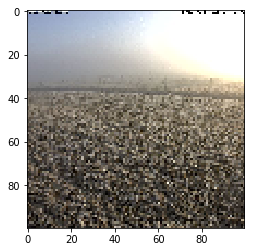

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0650.jpg


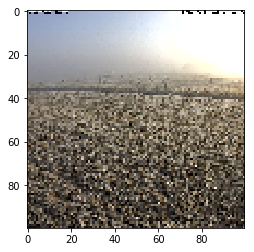

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180321_0700.jpg


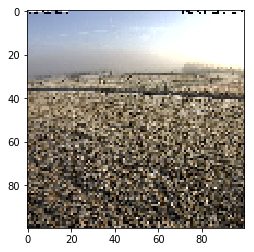

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180325_0540.jpg


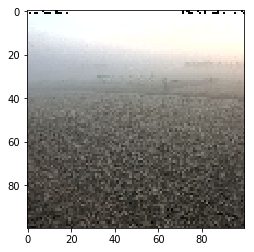

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180325_0550.jpg


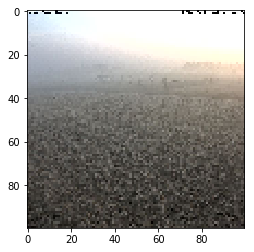

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180325_0610.jpg


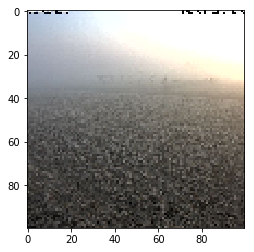

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180325_0620.jpg


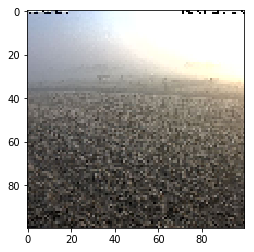

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0540.jpg


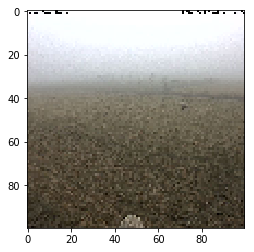

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0550.jpg


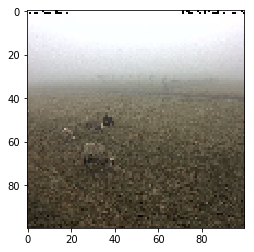

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0600.jpg


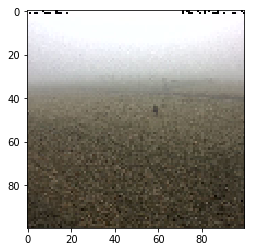

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0610.jpg


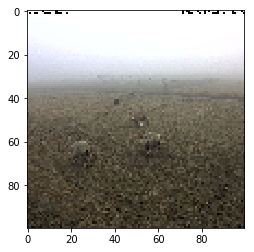

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0620.jpg


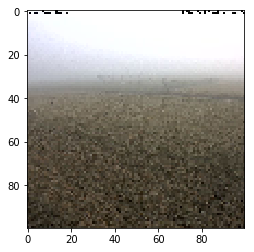

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0630.jpg


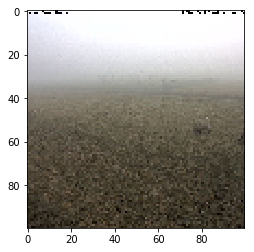

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0640.jpg


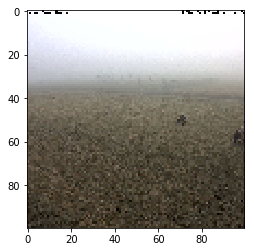

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0650.jpg


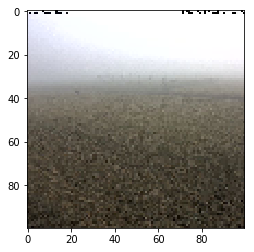

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0700.jpg


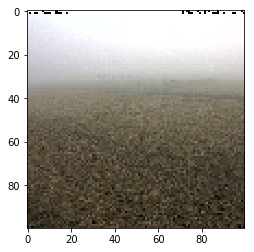

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0710.jpg


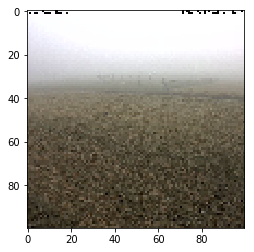

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0720.jpg


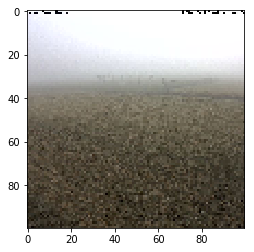

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0730.jpg


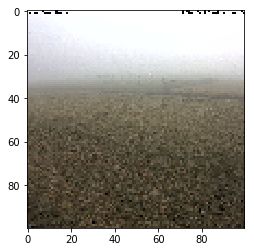

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0740.jpg


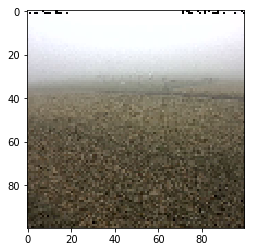

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0750.jpg


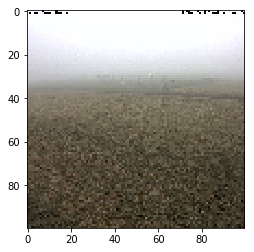

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0800.jpg


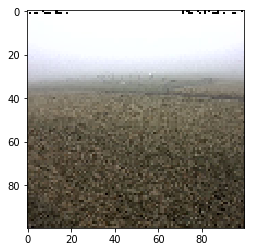

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0810.jpg


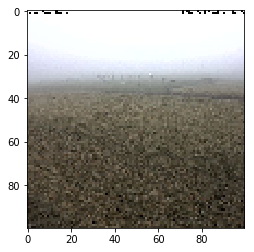

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180326_0820.jpg


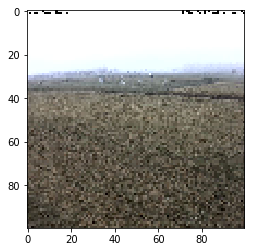

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201803/CABAUW-BSRN-2_20180327_0630.jpg


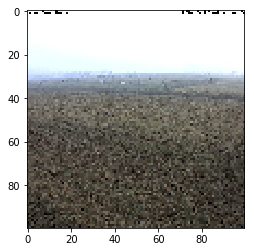

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201711/CABAUW-BSRN-2_20171107_0700.jpg


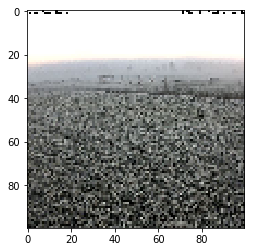

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201712/CABAUW-BSRN-2_20171202_0930.jpg


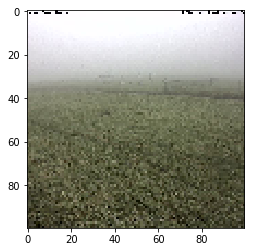

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201712/CABAUW-BSRN-2_20171202_1330.jpg


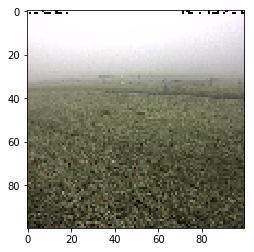

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201712/CABAUW-BSRN-2_20171202_0940.jpg


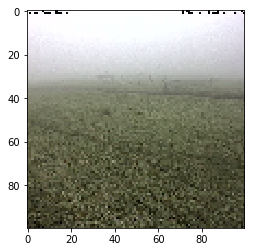

/Volumes/TIMPP/KNMIPictures/CABAUW/BSRN-2/201712/CABAUW-BSRN-2_20171202_1340.jpg


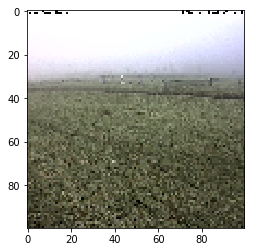

In [26]:
light = np.where(train_targets == 2)[0]
for idx in light[0:100]:
    print(paths_train[idx])
    plt.imshow(X_train[idx])
    plt.show()

In [23]:
X_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/knmi/knmi_train_images.npy')
train_targets = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/knmi/knmi_train_targets.npy')
paths_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/knmi/knmi_train_filepaths.npy')
meteo_train = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/knmi/knmi_train_meteo.npy')
meteo_train = meteo_train.reshape(meteo_train.shape[0], 4)

### Validation Data

In [3]:
X_validation = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/split/highway_val_images.npy')
validation_targets = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/split/highway_val_targets.npy')
paths_validation = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/split/highway_val_filepaths.npy')
meteo_validation = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/meteo/highway/split/highway_val_meteo.npy')
meteo_validation = meteo_validation.reshape(meteo_validation.shape[0], 4)

In [ ]:
test_features = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/test_images.npy')
test_targets = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/test_targets.npy')
test_filepaths = np.load('/Volumes/TIMPP/UnusedKNMI/numpyfiles/test_filepaths.npy')

In [ ]:
X_train = X_train[:3000]
train_targets = train_targets[:3000]
paths_train = paths_train[:3000]
meteo_train = meteo_train[:3000]

## CNN Helpers and Data Preparation

### Class Proportions (for Weighted Sampling)

In [10]:
# Get the class proportions
class_counts = np.bincount(train_targets.astype(int))
total = len(train_targets)
proportion_0 = class_counts[0] / total
proportion_1 = class_counts[1] / total
proportion_2 = class_counts[2] / total

print('Class percentages:\nNo fog: {:.2f}%\nFog: {:.2f}%\nDense fog: {:.2f}%'.format(proportion_0 * 100,
                                                                              proportion_1 * 100, proportion_2 * 100))
print(class_counts)

Class percentages:
No fog: 98.95%
Fog: 0.49%
Dense fog: 0.55%
[121982    607    684]


### Class Weighting

In [ ]:
# List containing class probabilities
probabilities = [proportion_0, proportion_1, proportion_2]
reciprocal_weights = []

# Put weight at every index
for i in range(len(X_train)):
    reciprocal_weights.append(probabilities[train_targets[i]])

# Inverse of probabilities as weights
weights = (1 / torch.Tensor(reciprocal_weights))
sampler = torch.utils.data.sampler.WeightedRandomSampler(weights.double(), len(X_train))

# Inverse weights for all the datapoints
inverse_weights_class = 1 / torch.Tensor(probabilities)

# Inverse weights per class
inverse_weights = 1/ torch.Tensor(probabilities)

### Transformations

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.ToPILImage(),
        transforms.RandomCrop(80),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'validation': transforms.Compose([
        transforms.ToPILImage(),
        transforms.CenterCrop(80),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

### Define Dataset Class

In [ ]:
class KNMIDataset(Dataset):
    def __init__(self, images, targets, filepaths, meteo, transforms=None):
    
        self.transforms = transforms
        self.images = images
        self.targets = targets
        self.filepaths = filepaths
        self.meteo = meteo

    def __getitem__(self, index):
        image = self.images[index]
        
        if self.transforms != None:
            image = self.transforms(image)
        
        target = self.targets[index]
        filepath = self.filepaths[index]
        meteo = self.meteo[index]
        
        return (image, target, index, filepath, meteo)

    def __len__(self):
        return len(self.targets)

### Create Datasets and Dataloaders

In [ ]:
BATCH_SIZE = 164

# Datasets
train_dataset = KNMIDataset(X_train, train_targets, paths_train, meteo_train, transforms=data_transforms['train'])
validation_dataset = KNMIDataset(X_validation, validation_targets, paths_validation, meteo_validation, transforms=data_transforms['validation'])

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
validation_loader = DataLoader(dataset=validation_dataset, batch_size=BATCH_SIZE)

loaders = {'train': train_loader, 'validation': validation_loader}

### Check Batch Iteration Size of Trainloader

In [ ]:
# Iteration for one train/testloader batch
img, labels, idx, paths, meteo = next(iter(validation_loader))
inputs, labels = Variable(img), Variable(labels)
print('Loader image tensor shape: {}\nLoader targets tensor shape: {}'.format(inputs.size(), labels.size()))

## Plotting Functions

### Confusion Matrix

In [ ]:
 # Confusion matrix helper
def show_cm(targets, predictions):
    cm = confusion_matrix(y_target=targets, 
                      y_predicted=predictions, 
                      binary=False)

    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()

### Loss Curve Plotting

In [ ]:
def plot_loss_curves(training_loss, validation_loss):
    """
    Plots loss curves after model training.
    
    :param training_loss: List with training loss for every epoch.
    :param validation_loss: List with validation loss for every epoch.
    """
    train_plot, = plt.plot(training_loss, label='Training')
    val_plot, = plt.plot(validation_loss, label='Validation')
    plt.title('Loss curves (training/validation)')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(handles=[train_plot, val_plot])
    plt.show()

### Certain/Uncertain Images Plotting

In [ ]:
def plot_images(loss, image_index, filepaths, targets, predictions, phase, amount=5):
    """
    Use to plot images that the model is most certain about and which it was most uncertain about.
    
    :param loss: Tensor that has size of batch containing loss
    :param filepaths: List with filepaths that point to where batch images are located
    :param amount: Amount of images to show. Default: 1
    """
    
    def loop_plot(indices, targets, predictions, filepaths, losses, phase):    
        fig=plt.figure(figsize=(20, 5))
        columns = 5
        rows = 1
        
        # Determine phase and get image np array
        if phase == 'train':
            image_array = X_train
        elif phase == 'validation':
            image_array = X_validation
        else:
            image_array = test_images
        print(filepaths)
        
        # Loop over the data and plot 'amount' of images
        for i, (index, target, prediction, loss) in enumerate(zip(indices, targets, predictions, losses)):
            img = image_array[index]
            fig.add_subplot(rows, columns, i + 1)
            plt.title('target: {}, prediction: {} loss: {:.2f}'.format(target, prediction, loss))
            plt.imshow(img)
      
        plt.show()
    
    def get_k_and_plot(loss, amount, targets, image_index, filepaths, predictions, phase, largest=True):
        # Get all relevant data
        values, indices = torch.topk(loss, amount, largest=largest)
        targets = [targets[i].data[0] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        images_idx = [image_index[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        filepaths = [filepaths[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        predictions = [predictions[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]
        loss = [loss.data[i] for i in list(indices.data.numpy().reshape((1, -1))[0])]

        # Show images (uncertain/certain)
        loop_plot(images_idx, targets, predictions, filepaths, loss, phase)

    print('Top {} most uncertain images'.format(amount))
    get_k_and_plot(loss, amount, targets, image_index, filepaths, predictions, phase, largest=True)

    print('Top {} most certain images'.format(amount))
    get_k_and_plot(loss, amount, targets, image_index, filepaths, predictions, phase, largest=False)

In [ ]:
def get_average_accuracy(predictions, targets):
  
    # Lists for holding corrects
    no_fog_correct = 0
    light_fog_correct = 0
    dense_fog_correct = 0

    for pred, target in zip(predictions, targets):
        if pred == 0 and target == 0:
            no_fog_correct += 1
        elif pred == 1 and target == 1:
            light_fog_correct += 1
        elif pred == 2 and target == 2:
            dense_fog_correct += 1

    # Validation counts
    total = np.bincount(validation_targets)
    no_fog_total = total[0]
    light_fog_total = total[1]
    dense_fog_total = total[2]

    # Accuracy per class
    acc_no_fog = no_fog_correct / no_fog_total
    acc_light = light_fog_correct / light_fog_total
    acc_dense = dense_fog_correct / dense_fog_total

    average_acc = (acc_no_fog + acc_light + acc_dense) / 3 * 100

    return average_acc

## Model Training

### Main Training Function

In [ ]:
def train_model(model, criterion, optimizer, num_epochs):
    """
    Does the actual training of the models.
    
    :param model: Model object specified in 'run_model'.
    :param criterion: Optimization criterion/loss.
    :param optimizer: Type of optimizer.
    :param num_epochs: Number of epochs to train.
    """
    start = time.time()

    # For storing loss for curve, best model and best accuracy
    train_loss, validation_loss = [],[]
    best_model = model
    best_accuracy = 0.0
    best_f1macro = 0.0

    for epoch in range(num_epochs):

        # Running loss and correct predictions
        running_loss_train = 0.0
        running_correct_train = 0.0
        running_loss_val = 0.0
        running_correct_val = 0.0
        epoch_validation_targets = []
        epoch_validation_predictions = []
        

        for phase in ['train', 'validation']:

            # Change model mode according to phase 
            if phase == 'train':
                model.train()
            else:
                model.eval()

            # Iterate over batches in loader
            for i, (image_tensor, label_tensor, image_index, filepaths, meteo) in enumerate(loaders[phase]):

                features = Variable(image_tensor)
                targets = Variable(label_tensor.view(-1))
                meteo_features = Variable(meteo.type(torch.FloatTensor))
                

                # Forward + Backward + Optimize
                if phase == 'train':
                    optimizer.zero_grad()

                outputs = model(features, meteo_features)

                # Get prediction index and no. correct predictions
                _, predictions = torch.max(outputs.data, 1) 
                
                # Kijk hier uit dat die testloader precies aantal batches in de validation data haalt 
                correct = torch.sum(predictions == targets.data) 

                # Loss and optimization
                loss = criterion(outputs, targets)
                
                # Average the loss
                total_loss = torch.mean(loss)
                
                # Only do backpropagation if in the training phase
                if phase == 'train':
                    total_loss.backward()
                    optimizer.step()

                # Running loss and number of correct predictions
                if phase == 'train':
                    running_loss_train += total_loss.data[0]
                    running_correct_train += correct
                else:
                    running_loss_val += total_loss.data[0]
                    running_correct_val += correct
                    epoch_validation_targets.extend(list(targets.data))
                    epoch_validation_predictions.extend(list(predictions))
                    
                    # Plot images in validation phase
#                     plot_images(loss, image_index, filepaths, targets, predictions, phase)

                # If model is in training phase, show loss every N iterations
                if (i+1) % 5 == 0:
                    if phase == 'train':
                        print ('Epoch {}/{}, Iteration {}/{} Train Running Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, 
                                                                                    len(X_train)//BATCH_SIZE, 
                                                                                    running_loss_train / i))
#                         plot_images(loss, image_index, filepaths, targets, predictions, phase)
                    

        # Epoch losses and epoch train accuracies
        epoch_train_loss = running_loss_train / (len(X_train)//BATCH_SIZE)
        epoch_train_accuracy = (running_correct_train / (len(X_train)//BATCH_SIZE)) / BATCH_SIZE * 100
        epoch_val_loss = running_loss_val / len(X_validation//BATCH_SIZE)
        epoch_val_accuracy= running_correct_val / len(X_validation) * 100
        
        # F1-score
        f1_macro = f1_score(epoch_validation_targets, epoch_validation_predictions, average='macro')
        f1_micro = f1_score(epoch_validation_targets, epoch_validation_predictions, average='micro')
        precision = precision_score(epoch_validation_targets, epoch_validation_predictions, average='macro')
        recall = recall_score(epoch_validation_targets, epoch_validation_predictions, average='macro')

        # Print the average epoch loss and the average prediction accuracy
        print('\nEpoch {}/{}, Train Loss: {:.4f}, Train Accuracy: {:.4f}%\n'
              'Validation Loss: {:.4f}, Validation Accuracy: {:.4f}%, f1-score {:.4f}\n'.format(epoch + 1, 
                                                                    num_epochs, epoch_train_loss, epoch_train_accuracy,
                                                                     epoch_val_loss, epoch_val_accuracy, f1_macro))
        
        # Safe best model and best accuracy 
        if phase == 'validation':
            if epoch_val_accuracy > best_accuracy:
                best_accuracy = epoch_val_accuracy
                best_model = copy.deepcopy(model)

        # Show the confusion matrix for validation targets/predictions
        show_cm(epoch_validation_targets, epoch_validation_predictions)
        
        # Append losses
        train_loss.append(epoch_train_loss)
        validation_loss.append(epoch_val_loss)
        
    # Elapsed time and best accuracy
    elapsed_time = time.time() - start
    print('Training was completed in {:.0f}m {:.0f}s\n'.format(elapsed_time//60, elapsed_time%60))
    print('Best validation accuracy: {:4f}%'.format(best_accuracy))
    
    # Plot loss curves
#     plot_loss_curves(train_loss, validation_loss)
    
    # Return the best model
    return best_model

### Run Model Function

In [ ]:
def run_model(model, epochs, learning_rate, train_from_layer=False, last_layer_trained=False, not_self_defined=True):
    '''
    Configures model object and then calls 'train_model' for model training. 
    
    :param train_from_layer: Specify number of layers before fully-connected to also be finetuned. Default is False,
    which will just train the fc layers. Give a number to specify number of layers before that. 
    :param model: This is a (pre-trained) model that will be further finetuned.
    :param epochs: Number of epochs to train.
    :param learning_rate: Learning rate for the parameters.
    :param not_self_defined: True if model architecture is used from torchvision. False if model is self-defined. 
    '''
    
    if not_self_defined:
      
        # Set all parameter training to false
        for parameter in model.parameters():
            parameter.requires_grad = False

        # Select number of pre-trained layers to finetune
        if train_from_layer != False:
            ct = 0
            print(ct)

            for name, child in model.named_children():
                ct += 1

                if ct > train_from_layer:
                    for name2, params in child.named_parameters():
                        params.requires_grad = True

          # Get parameters that need finetuning
            optim_params = filter(lambda p: p.requires_grad, model.parameters())

    # Adjust final layer to number of classes if last layer has not been trained yet
    if last_layer_trained == False:
        num_features = model.fc.in_features
        model.fc = nn.Linear(num_features, TARGET_SIZE)
        optim_params = model.fc.parameters()
    
    # Train all parameters if model is not predefined from torchvision
    else: 
        optim_params = filter(lambda p: p.requires_grad, model.parameters())
    
    if torch.cuda.is_available():
        inverse_weights.cuda()
        model = model.cuda()
    
    # Optimizers and loss criterions
    criterion = nn.CrossEntropyLoss(reduce=False, weight=inverse_weights)
    optimizer = optim.Adam(optim_params, lr=learning_rate)        
    
    # Train and save
    trained_model = train_model(model, criterion, optimizer, epochs)
    
    return trained_model

In [ ]:
input_size = 4
hidden_size = 100
output_size = 3

class meteo_NN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(meteo_NN, self).__init__()
        
        self.num_layers = num_layers
        
        # Input layer
        self.fc_input = nn.Linear(input_size, hidden_size)  

        # Hidden size dependent on input
        if num_layers == 1:      
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc_last = nn.Linear(hidden_size, output_size)
            
        elif num_layers == 2:
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.fc_last = nn.Linear(hidden_size, output_size)
            
        elif num_layers == 3:
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            self.fc3 = nn.Linear(hidden_size, hidden_size)
            self.fc4 = nn.Linear(hidden_size, hidden_size)
            self.fc_last = nn.Linear(hidden_size, output_size)
        
        else:
            raise ValueError('This net only takes a maximum of 3 hidden layers as input.')
                             
        self.relu = nn.ReLU()
    
    def forward(self, x):
        
        x = self.fc_input(x)
        x = self.relu(x)
        
        if self.num_layers == 1:
            x = self.fc2(x)
            x = self.relu(x)
            x = self.fc_last(x)
            
        elif self.num_layers == 2:
            x = self.fc2(x)
            x = self.relu(x)
            x = self.fc3(x)
            x = self.relu(x)
            x = self.fc_last(x)
        else:
            x = self.fc2(x)
            x = self.relu(x)
            x = self.fc3(x)
            x = self.relu(x)
            x = self.fc4(x)
            x = self.relu(x)
            x = self.fc_last(x)
        
        return x

In [ ]:
class resnet18_meteo(nn.Module):
    def __init__(self, resnet18, meteo_NN, num_classes):
        super(resnet18_meteo, self).__init__()
        
        # Respectively a torchvision resnet-18 and a 1-hidden layer NN
        self.resnet_CNN = resnet18
        self.meteo_net = meteo_NN
        
        # Sizes of the FC layers of both NN's
        self.len_fc_resnet = self.resnet_CNN.fc.in_features
        self.len_fc_meteo = self.meteo_net.fc_last.out_features
        print(self.len_fc_meteo)
        
        # Remove FC layer from the resnet 
        self.modules=list(self.resnet_CNN.children())[:-1]
        self.resnet18_convblocks= nn.Sequential(*self.modules)
        
        # Fully connected layer is now size resnet FC + meteo FC
        self.fc = nn.Linear(self.len_fc_resnet + self.len_fc_meteo, num_classes)
    
    def forward(self, img_x, meteo_x):
        
        # Both should be flattened layers at end of networks
        img_x = self.resnet18_convblocks(img_x)
        meteo_x = self.meteo_net(meteo_x)
        
        # Flatten convolutional features
        img_x_flattened = img_x.view(img_x.size(0), -1)
        
        # Concat the outputs of CNN and meteo-NN in fully connected layer
        out = torch.cat([img_x_flattened, meteo_x], dim=1)
        out = self.fc(out)
        return out   

In [ ]:
# Define meteo feedforward net
meteo_net = meteo_NN(input_size, hidden_size, output_size, 2)

# Define Resnet and remove FC layer
resnet18 = models.resnet18(pretrained=True)
resnet18.avgpool = nn.AdaptiveAvgPool2d(1)

# Meteo + resnet18
meteo_resnet = resnet18_meteo(resnet18, meteo_net, 3)

In [ ]:
def train_FFN(model, criterion, optimizer, num_epochs):
    """
    Does the actual training of the models.
    
    :param model: Model object specified in 'run_model'.
    :param criterion: Optimization criterion/loss.
    :param optimizer: Type of optimizer.
    :param num_epochs: Number of epochs to train.
    """
    start = time.time()

    # For storing loss for curve, best model and best accuracy
    train_loss, validation_loss = [],[]
    best_accuracy = 0.0
    best_avg_accuracy = 0.0
    best_f1macro = 0.0
    best_epoch_avg = 0
    best_epoch_f1 = 0
    best_model_avg = model
    best_model_f1 = model

    for epoch in range(num_epochs):

        # Running loss and correct predictions
        running_loss_train = 0.0
        running_correct_train = 0.0
        running_loss_val = 0.0
        running_correct_val = 0.0
        epoch_validation_targets = []
        epoch_validation_predictions = []
        
        validation_predictions = []
        validation_targets = []
        
        for phase in ['train', 'validation']:

            # Change model mode according to phase 
            if phase == 'train':
                model.train()
            else:
                model.eval()

            # Iterate over batches in loader
            for i, (image_tensor, label_tensor, image_index, filepaths, meteo) in enumerate(loaders[phase]):

                features = Variable(meteo.type(torch.FloatTensor))
                targets = Variable(label_tensor.view(-1))
                

                # Forward + Backward + Optimize
                if phase == 'train':
                    optimizer.zero_grad()

                outputs = model(features)

                # Get prediction index and no. correct predictions
                _, predictions = torch.max(outputs.data, 1) 
                
                # Kijk hier uit dat die testloader precies aantal batches in de validation data haalt 
                correct = torch.sum(predictions == targets.data) 
                
                if phase == 'validation':
                    validation_predictions.extend(predictions.cpu().numpy())
                    validation_targets.extend(targets.data.cpu().numpy())

                # Loss and optimization
                loss = criterion(outputs, targets)
                
                # Average the loss
                total_loss = torch.mean(loss)
                
                # Only do backpropagation if in the training phase
                if phase == 'train':
                    total_loss.backward()
                    optimizer.step()

                # Running loss and number of correct predictions
                if phase == 'train':
                    running_loss_train += total_loss.data[0]
                    running_correct_train += correct
                else:
                    running_loss_val += total_loss.data[0]
                    running_correct_val += correct
                    epoch_validation_targets.extend(list(targets.data))
                    epoch_validation_predictions.extend(list(predictions))
                    
                    # Plot images in validation phase
#                     plot_images(loss, image_index, filepaths, targets, predictions, phase)

                # If model is in training phase, show loss every N iterations
                if (i+1) % 50 == 0:
                    if phase == 'train':
                        print ('Epoch {}/{}, Iteration {}/{} Train Running Loss: {:.4f}'.format(epoch+1, num_epochs, i+1, 
                                                                                    len(X_train)//BATCH_SIZE, 
                                                                                    running_loss_train / i))
#                         plot_images(loss, image_index, filepaths, targets, predictions, phase)
                    

        # Epoch losses and epoch train accuracies
        epoch_train_loss = running_loss_train / (len(X_train)//BATCH_SIZE)
        epoch_train_accuracy = (running_correct_train / (len(X_train)//BATCH_SIZE)) / BATCH_SIZE * 100
        epoch_val_loss = running_loss_val / len(X_validation//BATCH_SIZE)
        epoch_val_accuracy= running_correct_val / len(X_validation) * 100
        
        # F1-score
        f1_macro = f1_score(epoch_validation_targets, epoch_validation_predictions, average='macro')
        f1_micro = f1_score(epoch_validation_targets, epoch_validation_predictions, average='micro')
        
        average_accuracy = get_average_accuracy(validation_predictions, validation_targets)
        
        # Print the average epoch loss and the average prediction accuracy
        print('\nEpoch {}/{}, Train Loss: {:.4f}, Train Accuracy: {:.4f}%\n'
              'Validation Loss: {:.4f}, Validation Overall Accuracy: {:.4f}%, Validation avg acc: {:4f}%, f1-score {:.4f}\n'.format(epoch + 1, 
                                                                    num_epochs, epoch_train_loss, epoch_train_accuracy,
                                                                     epoch_val_loss, epoch_val_accuracy, average_accuracy, f1_macro))
        
        # Safe best model and best accuracy 
        if phase == 'validation':
            if epoch_val_accuracy > best_accuracy:
                best_accuracy = epoch_val_accuracy
                best_model = copy.deepcopy(model)
            
            if f1_macro > best_f1macro:
                best_f1macro = f1_macro
                best_epoch_f1 = epoch
                best_model_f1 = copy.deepcopy(model)
            
            if average_accuracy > best_avg_accuracy:
                best_avg_accuracy = average_accuracy
                best_epoch_avg = epoch
                best_model_avg = copy.deepcopy(model)

        # Show the confusion matrix for validation targets/predictions
        show_cm(epoch_validation_targets, epoch_validation_predictions)
        
        # Append losses
        train_loss.append(epoch_train_loss)
        validation_loss.append(epoch_val_loss)
        
        checkpoint = {
          'epoch': epoch + 1,
          'best_epoch_f1': best_epoch_f1,
          'best_epoch_avg': best_epoch_avg,
          'state_dict': model,
          'best_f1': best_f1macro,
          'best_accuracy': best_accuracy,
          'optimizer': optimizer.state_dict(),
          'best_model_avg': best_model_avg,
          'best_model_f1': best_model_f1,
          'validation_loss' : validation_loss,
          'train_loss' : train_loss,
          'best_avg_acc': best_avg_accuracy          
        }
        
    # Elapsed time and best accuracy
    elapsed_time = time.time() - start
    print('Training was completed in {:.0f}m {:.0f}s\n'.format(elapsed_time//60, elapsed_time%60))
    print('Best validation accuracy: {:4f}%'.format(best_accuracy))
    print('Best validation f1-macro: {:.4f}'.format(f1_macro))
    print('Best average validation accuracy: {:.4f}%'.format(best_avg_accuracy))
    # Return the best model
    return checkpoint

In [11]:
meteo_input = 4
meteo_epochs = 1
accuracy_dict = {}

# Hyperparameters meteorological net tuning
lr_meteo = 0.05
num_nodes = [i for i in range(2, 12, 2)]
num_layers = [1,2,3]
meteo_num_epochs = 20

for layer_size in num_layers:
    for node_size in num_nodes:
    
        model = meteo_NN(input_size=meteo_input, hidden_size=node_size, output_size=3, num_layers=layer_size)
        optim_params = filter(lambda p: p.requires_grad, model.parameters())
        
        # Optimizers and loss criterions
        criterion = nn.CrossEntropyLoss(reduce=False, weight=inverse_weights)
        optimizer = optim.Adam(optim_params, lr=lr_meteo)        

        trained = train_FFN(model, criterion, optimizer, meteo_epochs)

        if str(layer_size) in accuracy_dict.keys():
            accuracy_dict[str(layer_size)][str(node_size)] = {'f1' : trained['best_f1'], 
                                                                'avg_acc': trained['best_avg_acc']}
        else:
            accuracy_dict[str(layer_size)] = {str(node_size) : {'f1' : trained['best_f1'], 
                                                                'avg_acc': trained['best_avg_acc']}}
        print(accuracy_dict)

NameError: name 'meteo_NN' is not defined

In [ ]:
best_f1, best_avg_acc, nodes_f1, layers_f1, nodes_avg, layers_avg  = 0, 0, 0, 0, 0, 0

for layer_size, node_size in accuracy_dict.items():
    for key, metrics in node_size.items():
        if metrics['f1'] > best_f1:
            best_f1 = metrics['f1']
            nodes_f1 = key
            layers_f1 = layer_size 
        if metrics['avg_acc'] > best_avg_acc:
            best_avg_acc = metrics['avg_acc']
            nodes_avg = key
            layers_avg = layer_size 

print('Best f1 with {} layers and {} nodes. F1-macro: {}'.format(layers_f1, nodes_f1, best_f1))
print('Best average accuracy with {} layers and {} nodes. Avg accuracy: {}'.format(layers_f1, nodes_f1, best_avg_acc))

### Resnet 18

In [ ]:
lr_classifier = 2e-4
lr_tuner = 1e-4

# Train last FC layer of resnet 18
resnet_18 = models.resnet18(pretrained=True)
resnet_18.avgpool = nn.AdaptiveAvgPool2d(1)
resnet_18_trained = run_model(resnet_18, 10, lr_classifier, False)

# Tune also the last convolutional layer
# resnet_18_tuned = run_model(resnet_18_trained, 15, lr_tuner, train_from_layer=7)

In [ ]:
torch.save(resnet_18_trained, '../models/trainedModels/owntrained/best-resnet-18.pt')

## Pre-trained Model Loader

In [ ]:
def load_model(filepath):
    '''
    Loads a trained model.
    
    :param filepath: Path to the trained model.
    '''
    loaded_model = torch.load(filepath, map_location=lambda storage, loc: storage)
    return loaded_model

In [ ]:
TRAINED_MODELS_DIR = '/Volumes/TIMPP/TrainedModels'

# current_model = load_model('/Volumes/TIMPP/TrainedModels/knmi-images/resnet-18/Resnet2/best-resnet-18_tuned.pt')
current_model_trained = load_model(TRAINED_MODELS_DIR + '/knmi-highway/resnet-18/classifier/KNMIhighway_classifier.pth.tar')
current_model_tuned = load_model(TRAINED_MODELS_DIR + '/knmi-highway/resnet-18/tuner/bestKNMIHighway_tuner.pth.tar')
current_model_tuned = current_model_tuned['best_model']
# type(current_model_tuned.load_state_dict())

## Test Model Function

### Test Dataset and Dataloader 

In [ ]:
test_dataset = KNMIDataset(test_features, test_targets, test_filepaths, transforms=data_transforms['validation'])
test_dataloader = DataLoader(dataset=test_dataset, batch_size=len(test_features))

In [ ]:
current_model_train = load_model('../../../../Downloads/checkpoint123.pth.tar')
current_model_train['best_epoch_avg']

### Model Test Function

In [ ]:
def test_model(model, dataloader):
    """
    Tests a specified model on all the manually labeled highway camera
    images. 
    
    :param model: Trained model to evaluate
    :param test_features: All test features as tensor
    :param test_targets: All test labels as tensor
    """
    
    test_images, test_targets, idx, test_filepaths = next(iter(dataloader))
    
    # Loss criterion
    criterion = nn.CrossEntropyLoss(reduce=False)
    
    # Wrap tensors
    features = Variable(test_images)
    targets = Variable(test_targets)
    total = len(targets)
    
    model.eval()
    
    # Feed test features into model
    outputs = model(features)
    
    # Loss and optimization
    loss = criterion(outputs, targets)
    
    # Get test predictions and number of correct predictions
    _, predictions = torch.max(outputs.data, 1) 
    correct = torch.sum(predictions == targets.data)
    
    corrects = predictions == targets.data
    
    for i, cor in enumerate(corrects):
        if predictions[i] == 0 and cor == 0:
            print(test_filepaths[i])
            print(test_targets[i])
            img = test_features[i]
            plt.imshow(img)
            plt.show()
             
    image_indices = list(range(0, total))
#     plot_images(loss, image_indices, test_filepaths, targets, predictions, phase='test')
    
    test_accuracy = correct / total * 100  
    print('Test accuracy: {:.2f}%'.format(test_accuracy))
    show_cm(list(targets.data), list(predictions))
    
test_model(current_model_tuned, test_dataloader)